# Dimensionality Reduction

In [45]:
from sklearn.datasets           import load_breast_cancer
from sklearn.decomposition      import PCA
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.pipeline           import make_pipeline
from sklearn.preprocessing      import StandardScaler
from sklearn.model_selection    import train_test_split
import matplotlib.pyplot        as plt
import numpy                    as np
import pandas                   as pd
import mglearn

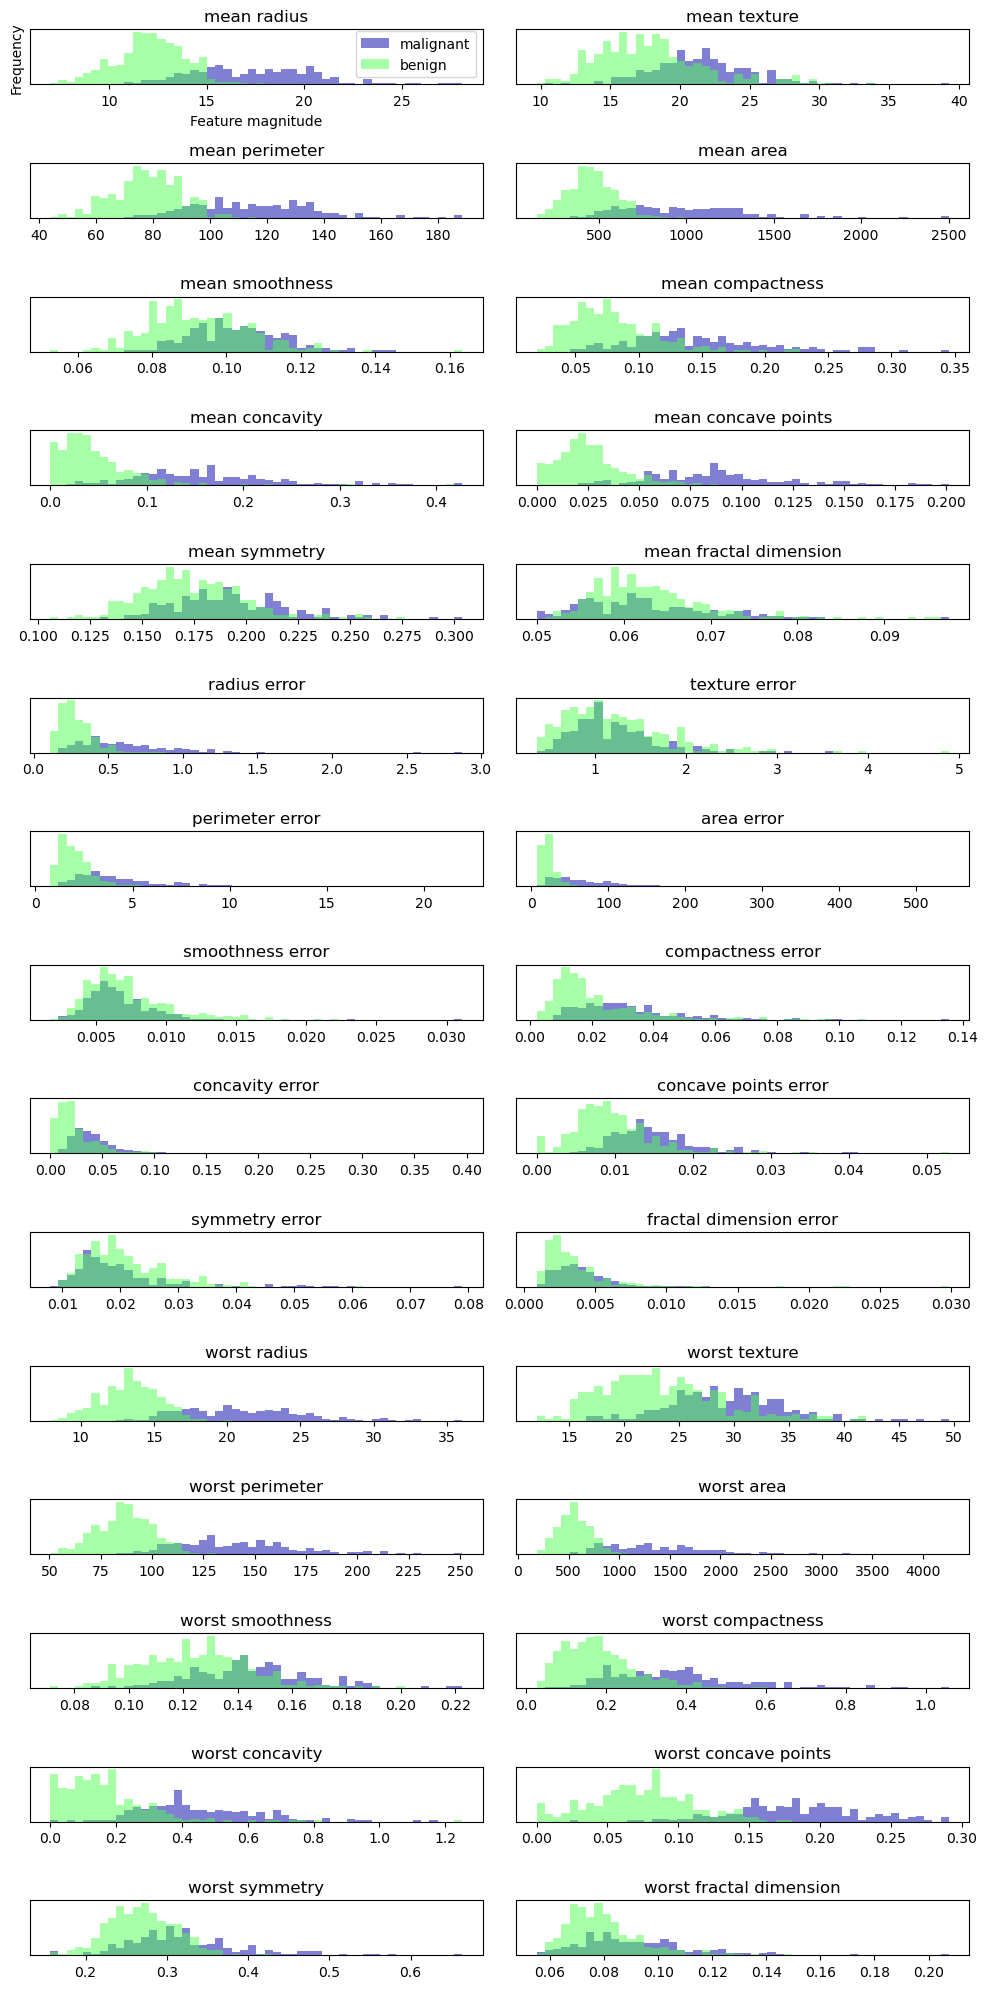

In [27]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
plt.show()

## Steps for PCA

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", str(X_scaled.shape))
print("Reduced shape:", str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [32]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

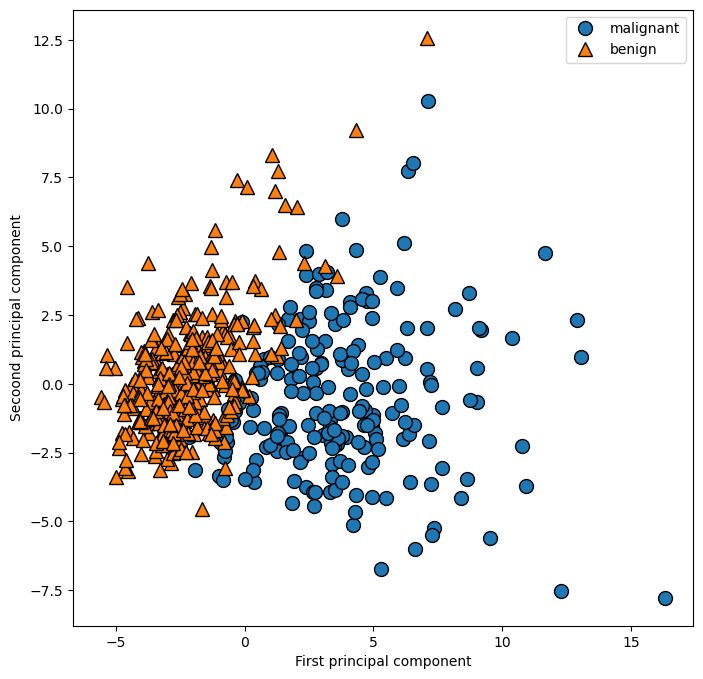

In [35]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.xlabel("First principal component")
plt.ylabel("Secoond principal component")
plt.show()

In [7]:
print("PCA component shape:", pca.components_.shape)
print(pca.components_)

PCA component shape: (2, 30)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

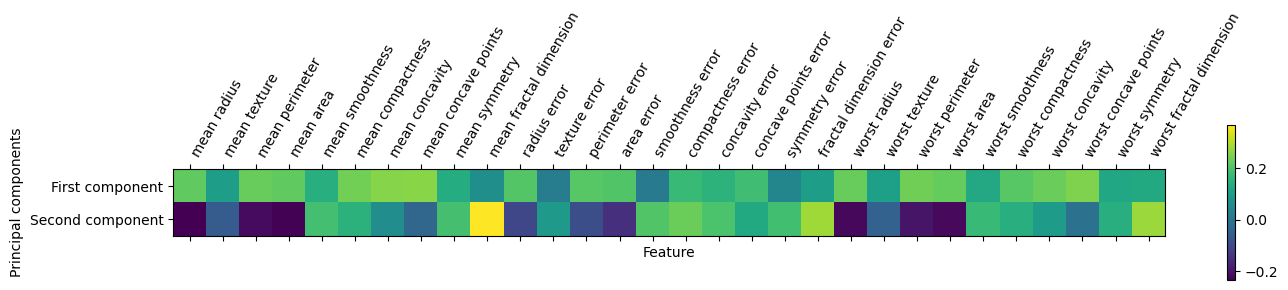

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Phishing Site Detection Example

In [36]:
df = pd.read_csv('data/fishing_dataset_full.csv')
print(len(df))
df.head()

88647


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [39]:
df_X = df.drop(columns=['phishing'])
df_y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled.shape

(66485, 111)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)

print(f'Train Score: {knn.score(X_train_scaled, y_train):.3f}')
print(f'Test Score: {knn.score(X_test_scaled, y_test):.3f}')

Train Score: 0.975
Test Score: 0.953


In [15]:
lr = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)

print(f'Train Score: {lr.score(X_train_scaled, y_train):.5f}')
print(f'Test Score: {lr.score(X_test_scaled, y_test):.5f}')

Train Score: 0.93362
Test Score: 0.93259


### PCA

In [40]:
pca = PCA(n_components=6, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [41]:
X_train_pca.shape

(66485, 6)

In [42]:
pca.components_

array([[ 5.27963439e-02,  5.31149562e-02,  5.32878141e-02,
         1.31832992e-01,  3.34006489e-02,  8.00642107e-02,
         3.19711646e-02,  6.24188721e-02,  1.04048134e-02,
         3.73941568e-03,  1.08667489e-02,  1.11576746e-02,
         9.38031990e-03,  1.22633776e-02,  1.66708580e-03,
         1.12543884e-02,  2.48643315e-02,  5.23807198e-02,
         1.08923151e-01, -3.70665126e-02,  1.34742387e-02,
        -2.06602262e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.17687932e-02, -6.14713300e-03,  7.68821849e-03,
        -1.35947135e-03,  1.41580193e-01,  1.07056802e-01,
         1.37591364e-01,  1.43473233e-01,  1.61203404e-01,
         1.58471336e-01,  1.46760191e-01,  1.52832928e-01,
         1.60381585e-01,  1.59865956e-01,  1.59682971e-0

In [19]:
pca.components_.shape
X_test_pca.shape
X_test_pca

(6, 111)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_pca, y_train)

print(f'Train Score: {knn.score(X_train_pca, y_train):.3f}')
print(f'Test Score: {knn.score(X_test_pca, y_test):.3f}')

Train Score: 0.965
Test Score: 0.942


In [23]:
lr = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)

print(f'Train Score: {lr.score(X_train_pca, y_train):.5f}')
print(f'Test Score: {lr.score(X_test_pca, y_test):.5f}')

Train Score: 0.86576
Test Score: 0.86716


### make_pipeline

In [24]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

print("Pipeline Steps:\n", pipe.steps)
print(f"Train Score: {pipe.score(X_train,y_train):.5f}")
print(f"Test Score: {pipe.score(X_test,y_test):.5f}")

Pipeline Steps:
 [('standardscaler', StandardScaler()), ('pca', PCA(n_components=6)), ('logisticregression', LogisticRegression(max_iter=1000))]
Train Score: 0.86573
Test Score: 0.86721
